In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Juan Jose Usuga Giraldo 1020482080
*Métodos computacionales 2024-II*

---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y evalue $f''(\pi/8)$ con $h = 0.05$.
* Encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [2]:
# Implementar la derivada de cinco puntos
def five_point_derivative(f, x, h):
    """ Calcula la primera derivada usando el método de cinco puntos """
    return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h)) / (12 * h)

# Implementar la segunda derivada usando cinco puntos
def five_point_second_derivative(f, x, h):
    """ Calcula la segunda derivada usando el método de cinco puntos """
    return (-f(x + 2*h) + 16*f(x + h) - 30*f(x) + 16*f(x - h) - f(x - 2*h)) / (12 * h**2)

# Definir la función f(x) = cos(x)
f = np.cos

# Definir valores de x entre 0 y 2π con 10 puntos
x_values = np.linspace(0, 2*np.pi, 10)

# Evaluar la segunda derivada en x = π/8 con h = 0.05
x_eval = np.pi / 8
h = 0.05
second_derivative_approx = five_point_second_derivative(f, x_eval, h)

# Calcular la derivada exacta
second_derivative_exact = -np.cos(x_eval)

# Calcular el error absoluto
error = abs(second_derivative_approx - second_derivative_exact)

second_derivative_approx, second_derivative_exact, error


(-0.9238794683673055, -0.9238795325112867, 6.414398123766318e-08)

Un h menor reduce el error hasta cierto punto, pero si es demasiado pequeño, los errores de redondeo pueden afectar la precisión, por otro lado un h mayor generalmente aumenta el error

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`
*   ¿Cuál será el valor óptimo de $h$?

In [5]:
from scipy.misc import derivative

# Definir la función f(x) = x * exp(x)
def f(x):
    return x * np.exp(x)

# Valores de h desde 0.01 hasta 0.1 (10 valores)
h_values = np.linspace(0.01, 0.1, 10)
x_eval = 2.0  # Punto donde evaluamos

# Listas para almacenar los errores
errors_f1 = []
errors_f2 = []

# Valores exactos usando Scipy
f1_exact = derivative(f, x_eval, dx=1e-8, n=1, order=5)
f2_exact = derivative(f, x_eval, dx=1e-8, n=2, order=5)

# Evaluar derivadas con diferencias finitas
for h in h_values:
    # Primera derivada con cinco puntos
    f1_approx = five_point_derivative(f, x_eval, h)

    # Segunda derivada con cinco puntos
    f2_approx = five_point_second_derivative(f, x_eval, h)

    # Calcular errores
    error_f1 = abs(f1_approx - f1_exact)
    error_f2 = abs(f2_approx - f2_exact)

    errors_f1.append(error_f1)
    errors_f2.append(error_f2)

# Encontrar el h óptimo (mínimo error)
optimal_h_f1 = h_values[np.argmin(errors_f1)]
optimal_h_f2 = h_values[np.argmin(errors_f2)]

optimal_h_f1, optimal_h_f2


<ipython-input-5-43068a995572>:16: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  f1_exact = derivative(f, x_eval, dx=1e-8, n=1, order=5)
<ipython-input-5-43068a995572>:17: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  f2_exact = derivative(f, x_eval, dx=1e-8, n=2, order=5)


(0.020000000000000004, 0.1)

Para la primera derivada un h menor da una mejor precision, para la segunda derivada un h mayor reduce el error

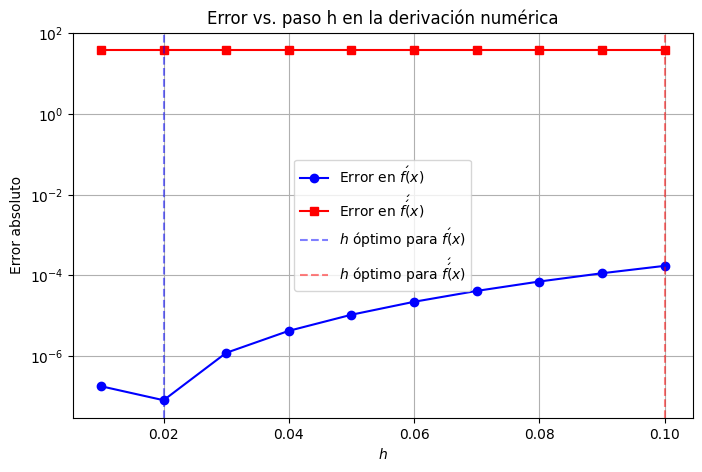

In [4]:
# Graficar errores
plt.figure(figsize=(8, 5))
plt.plot(h_values, errors_f1, label=r'Error en $f\'(x)$', marker='o', color='b')
plt.plot(h_values, errors_f2, label=r'Error en $f\'\'(x)$', marker='s', color='r')
plt.axvline(optimal_h_f1, linestyle="--", color="b", alpha=0.5, label=r'$h$ óptimo para $f\'(x)$')
plt.axvline(optimal_h_f2, linestyle="--", color="r", alpha=0.5, label=r'$h$ óptimo para $f\'\'(x)$')

# Configuración del gráfico
plt.xlabel(r'$h$')
plt.ylabel('Error absoluto')
plt.yscale("log")  # Escala logarítmica para visualizar mejor
plt.title('Error vs. paso h en la derivación numérica')
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()


#3.
Compare la primera derivada del punto 2 usando los métodos de diferencias finitas, derivada de tres y cinco puntos para el $h$ con el menor error encontrado en el punto anterior. Compare de nuevo para $f'(2)$ y encuentre los errores.

In [6]:
# Definir métodos de diferencias finitas

# Diferencias finitas hacia adelante (tres puntos)
def forward_difference(f, x, h):
    return (-3*f(x) + 4*f(x + h) - f(x + 2*h)) / (2*h)

# Diferencias finitas centradas (tres puntos)
def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2*h)

# Evaluar derivadas con h óptimo
h_opt = optimal_h_f1  # h = 0.02

f1_forward = forward_difference(f, x_eval, h_opt)
f1_central = central_difference(f, x_eval, h_opt)
f1_five_point = five_point_derivative(f, x_eval, h_opt)

# Calcular errores absolutos
error_forward = abs(f1_forward - f1_exact)
error_central = abs(f1_central - f1_exact)
error_five_point = abs(f1_five_point - f1_exact)

f1_forward, f1_central, f1_five_point, error_forward, error_central, error_five_point


(22.162152617281933,
 22.169631384456995,
 22.167168020916986,
 0.005015483824038824,
 0.0024632833510231933,
 8.018898611794611e-08)